In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping


In [366]:

# Misalnya dataset kamu sudah dalam bentuk pandas DataFrame
dataset = pd.read_csv("../data/dataset (13).csv")

# Menentukan fitur dan target
features = dataset[['bandwidthSpeeds', 'oldBitrates', 'streamBandwidths', 
                    'estimatedBandwidths',]]  # Pilih beberapa fitur
# features = dataset[['oldBitrates']]  # Pilih beberapa fitur
target = dataset['newBitrates']  # Target
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))
# Normalisasi data
train_features, test_features, train_target, test_target = train_test_split(
    features_scaled, target_scaled, test_size=0.2, shuffle=False)
dataset


,activeBitrates,bufferingEvents,timeStamps,newBitrates,oldBitrates,resolutions,streamBandwidths,estimatedBandwidths,bandwidthSpeeds,decodedFrames,droppedFrames
0,826869,0.038,2024-09-14T11:46:09.387Z,14998609,1080381,3840p,1.4,1.9,1.3,42,0
1,826869,0.038,2024-09-14T11:46:10.450Z,14998609,1080381,3840p,1.4,7.9,1.3,73,0
2,826869,0.038,2024-09-14T11:46:11.506Z,14998609,1080381,3840p,1.4,7.9,1.3,105,0
3,826869,0.038,2024-09-14T11:46:12.565Z,14998609,1080381,3840p,1.4,7.9,1.3,137,0
4,826869,0.038,2024-09-14T11:46:13.632Z,14998609,1080381,3840p,1.4,7.9,1.3,169,0
...,...,...,...,...,...,...,...,...,...,...,...
483,826869,1059.645,2024-09-14T12:12:40.439Z,1080381,1321829,640p,1.0,1.6,1.4,5810,30
484,826869,1160.349,2024-09-14T12:14:23.439Z,1080381,1321829,640p,1.0,8.7,1.4,5827,34
485,826869,1160.349,2024-09-14T12:14:24.504Z,1080381,1321829,640p,1.0,8.7,1.4,5827,34
486,826869,1160.349,2024-09-14T12:14:25.570Z,826869,1080381,480p,8.0,8.7,1.4,5827,34


In [164]:
# Reshape data jadi [samples, timesteps, features]
  # Misalnya, kita mau prediksi berdasarkan 5 timesteps sebelumnya
def create_sequences(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        Xs.append(X[i:i+timesteps])
        ys.append(y[i+timesteps])
    return np.array(Xs), np.array(ys)

sequence_length = 10
X_train, y_train = create_sequences(train_features, train_target, sequence_length)
X_test, y_test = create_sequences(test_features, test_target, sequence_length)



In [360]:
model = Sequential()
# model.add(GRU(units=32, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dropout(0.2))
# model.add(GRU(units=32))
# model.add(Dropout(0.2))
# model.add(Dense(1))  # Output layer untuk prediksi single target (newBitrates)

# model.compile(optimizer='adam', loss='mean_squared_error')
# model.summary()
model.add(GRU(units=128, return_sequences=True, 
              kernel_regularizer=l2(0.002),    # Tambahkan L2 regularization
              input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.1))
model.add(GRU(units=64 , kernel_regularizer=l2(0.002)))  # L2 lagi di layer GRU kedua
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

d:\cursor_code\python\Lstm\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_68 (GRU)                    │ (None, 10, 128)        │        51,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_67 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_69 (GRU)                    │ (None, 64)             │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 88,769 (346.75 KB)

 Trainable params: 88,769 (346.75 KB)

 Non-trainable params: 0 (0.00 B)

In [361]:
# history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), shuffle=False,validation_split=0.2, verbose=1)

# history = model.fit(X_train, y_train, epochs=50, batch_size=10,validation_split=0.2, verbose=1)

# Definisikan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Latih model dengan early stopping
# history = model.fit(X_train, y_train, epochs=100,batch_size=4, callbacks=[early_stopping],validation_split=0.1, verbose=1)
history = model.fit(X_train, y_train, epochs=100,batch_size=10, callbacks=[early_stopping],validation_split=0.2, verbose=1,validation_data=(X_test, y_test))


Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.2745 - val_loss: 0.1437
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1197 - val_loss: 0.0588
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0506 - val_loss: 0.0237
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221 - val_loss: 0.0102
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0107 - val_loss: 0.0045
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0067 - val_loss: 0.0026
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0043 - val_loss: 0.0020
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0015
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0043 - val_loss: 9.1607e-04
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0033 - val_loss: 7.7144e-04
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0036 - val_loss: 7.0572e-04
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0

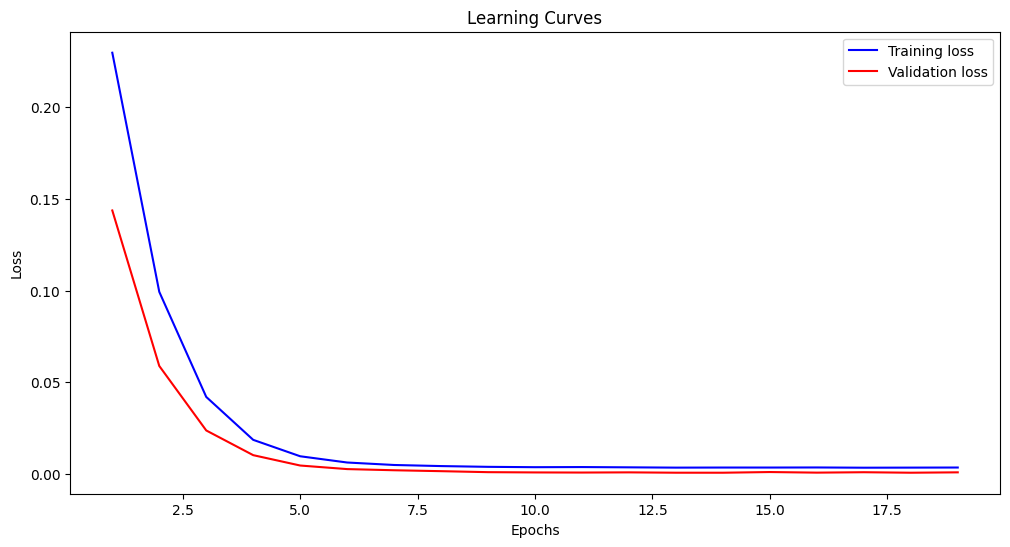

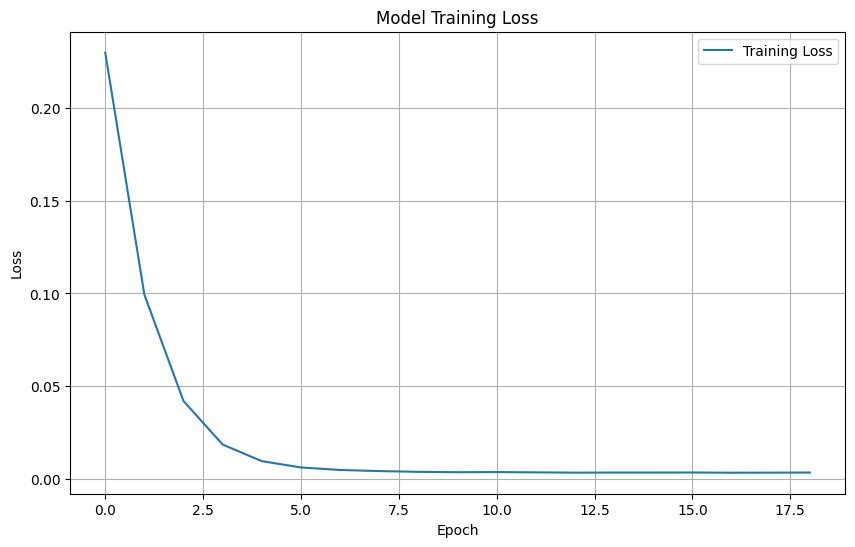

In [362]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss'], loc='upper right')
plt.grid(True)
plt.show()


In [363]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step
MSE: 0.00047474111589293147
MAE: 0.014734846552163177
RMSE: 0.021788554699496053


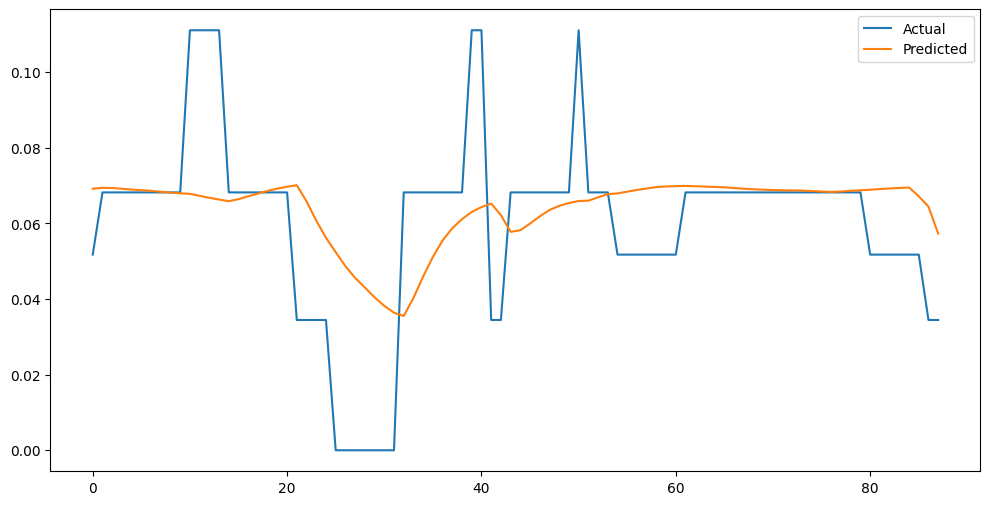

In [364]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()


In [365]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y_test, predictions)
r2


# 0.19272100607684373


0.21250863152987787

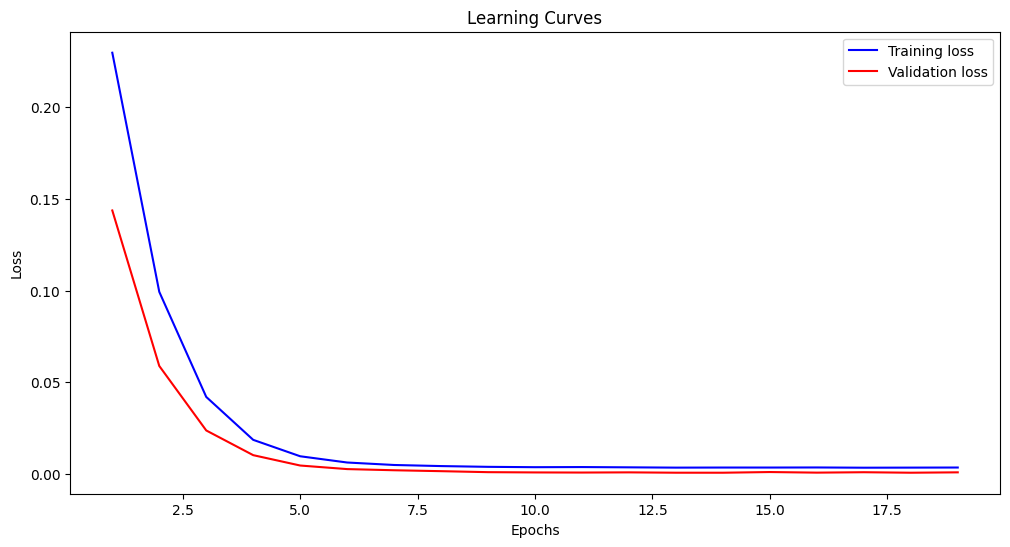

In [367]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting
plt.figure(figsize=(12, 6))

plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [377]:
def calculate_gru_complexity(N, T, n, h1, h2, epochs):
    """
    Menghitung kompleksitas waktu total untuk model GRU berdasarkan parameter yang diberikan.
    
    N      : Jumlah total data (rows/samples)
    T      : Panjang sequence (sequence length)
    n      : Ukuran batch (batch size)
    h1     : Hidden units untuk GRU layer pertama
    h2     : Hidden units untuk GRU layer kedua
    epochs : Jumlah epochs untuk training
    """
    
    # Time complexity untuk GRU layer pertama (return_sequences=True)
    time_gru1 = T * (n * h1)  # O(T * (n * h))
    
    # Time complexity untuk GRU layer kedua (return_sequences=False)
    time_gru2 = n * h2  # O(n * h)
    
    # Time complexity untuk Dense layer
    time_dense = n  # O(n)
    
    # Kompleksitas total per batch
    total_per_batch = time_gru1 + time_gru2 + time_dense
    
    # Jumlah batch per epoch (N = total rows, n = batch size)
    num_batches_per_epoch = N // n
    
    # Kompleksitas waktu per epoch
    time_per_epoch = total_per_batch * num_batches_per_epoch
    
    # Kompleksitas waktu total untuk semua epoch
    total_time_complexity = time_per_epoch * epochs
    
    return total_time_complexity

def calculate_lstm_complexity(N, T, n, h1, h2, epochs):
    """
    Menghitung kompleksitas waktu total untuk model LSTM berdasarkan parameter yang diberikan.
    
    N      : Jumlah total data (rows/samples)
    T      : Panjang sequence (sequence length)
    n      : Ukuran batch (batch size)
    h1     : Hidden units untuk LSTM layer pertama
    h2     : Hidden units untuk LSTM layer kedua
    epochs : Jumlah epochs untuk training
    """
    
    # Time complexity untuk LSTM layer pertama (return_sequences=True)
    # LSTM lebih kompleks dari GRU karena punya 4 komponen utama per unit
    time_lstm1 = T * (n * h1 * 4)  # O(T * (n * h * 4))
    
    # Time complexity untuk LSTM layer kedua (return_sequences=False)
    time_lstm2 = n * h2 * 4  # O(n * h * 4)
    
    # Time complexity untuk Dense layer
    time_dense = n  # O(n)
    
    # Kompleksitas total per batch
    total_per_batch = time_lstm1 + time_lstm2 + time_dense
    
    # Jumlah batch per epoch (N = total rows, n = batch size)
    num_batches_per_epoch = N // n
    
    # Kompleksitas waktu per epoch
    time_per_epoch = total_per_batch * num_batches_per_epoch
    
    # Kompleksitas waktu total untuk semua epoch
    total_time_complexity = time_per_epoch * epochs
    
    return total_time_complexity


# Contoh penggunaan fungsi
N = 488    # Total rows/samples di dataset
T = 5      # Panjang sequence
n = 10     # Ukuran batch
h1 = 128   # Hidden units LSTM layer pertama
h2 = 64    # Hidden units LSTM layer kedua
epochs = 100  # Jumlah epochs

total_lstm_complexity = calculate_lstm_complexity(N, T, n, h1, h2, epochs)
print(f"Total time complexity (LSTM): O({total_lstm_complexity})")



Total time complexity (LSTM): O(135216000)


In [378]:
N = 488    # Total rows/samples di dataset
T = 5      # Panjang sequence
n = 10     # Ukuran batch
h1 = 128   # Hidden units GRU layer pertama
h2 = 64    # Hidden units GRU layer kedua
epochs = 100  # Jumlah epochs

total_complexity = calculate_gru_complexity(N, T, n, h1, h2, epochs)
print(f"Total time complexity: O({total_complexity})")


Total time complexity: O(33840000)


In [376]:
def calculate_lstm_single_layer_complexity(N, T, n, h, epochs):
    """
    Menghitung kompleksitas waktu total untuk model LSTM dengan satu hidden layer.
    
    N      : Jumlah total data (rows/samples)
    T      : Panjang sequence (sequence length)
    n      : Ukuran batch (batch size)
    h      : Hidden units untuk LSTM layer
    epochs : Jumlah epochs untuk training
    """
    
    # Time complexity untuk LSTM layer pertama (return_sequences=False karena cuma 1 layer)
    # LSTM punya 4 gate, jadi kalikan dengan 4
    time_lstm = T * (n * h * 4)  # O(T * (n * h * 4))
    
    # Time complexity untuk Dense layer
    time_dense = n  # O(n)
    
    # Kompleksitas total per batch
    total_per_batch = time_lstm + time_dense
    
    # Jumlah batch per epoch (N = total rows, n = batch size)
    num_batches_per_epoch = N // n
    
    # Kompleksitas waktu per epoch
    time_per_epoch = total_per_batch * num_batches_per_epoch
    
    # Kompleksitas waktu total untuk semua epoch
    total_time_complexity = time_per_epoch * epochs
    
    return total_time_complexity


# Contoh penggunaan fungsi untuk model dengan 1 LSTM layer 50 units
N = 488    # Total rows/samples di dataset
T = 5      # Panjang sequence
n = 10     # Ukuran batch
h = 50     # Hidden units LSTM layer (hanya 50 units di sini)
epochs = 100  # Jumlah epochs

total_lstm_complexity_single_layer = calculate_lstm_single_layer_complexity(N, T, n, h, epochs)
print(f"Total time complexity (Single Layer LSTM): O({total_lstm_complexity_single_layer})")


Total time complexity (Single Layer LSTM): O(48048000)


In [372]:
def calculate_lstm_complexity(N, T, n, h1, h2, epochs):
    """
    Menghitung kompleksitas waktu total untuk model LSTM berdasarkan parameter yang diberikan.
    
    N      : Jumlah total data (rows/samples)
    T      : Panjang sequence (sequence length)
    n      : Ukuran batch (batch size)
    h1     : Hidden units untuk LSTM layer pertama
    h2     : Hidden units untuk LSTM layer kedua
    epochs : Jumlah epochs untuk training
    """
    
    # Time complexity untuk LSTM layer pertama (return_sequences=True)
    # LSTM lebih kompleks dari GRU karena punya 4 komponen utama per unit
    time_lstm1 = T * (n * h1 * 4)  # O(T * (n * h * 4))
    
    # Time complexity untuk LSTM layer kedua (return_sequences=False)
    time_lstm2 = n * h2 * 4  # O(n * h * 4)
    
    # Time complexity untuk Dense layer
    time_dense = n  # O(n)
    
    # Kompleksitas total per batch
    total_per_batch = time_lstm1 + time_lstm2 + time_dense
    
    # Jumlah batch per epoch (N = total rows, n = batch size)
    num_batches_per_epoch = N // n
    
    # Kompleksitas waktu per epoch
    time_per_epoch = total_per_batch * num_batches_per_epoch
    
    # Kompleksitas waktu total untuk semua epoch
    total_time_complexity = time_per_epoch * epochs
    
    return total_time_complexity


# Contoh penggunaan fungsi
N = 488    # Total rows/samples di dataset
T = 10    # Panjang sequence
n = 10     # Ukuran batch
h1 = 50   # Hidden units LSTM layer pertama
    # Hidden units LSTM layer kedua
epochs = 100  # Jumlah epochs

total_lstm_complexity = calculate_lstm_complexity(N, T, n, h1, h2, epochs)
print(f"Total time complexity (LSTM): O({total_lstm_complexity})")


Total time complexity (LSTM): O(108336000)
